# 02. Neural Network Classification with TensorFlow

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [100]:
print(tf.__version__)

2.19.0


In [101]:
from sklearn.datasets import make_circles

X, y = make_circles(1000, random_state=42, noise=0.03)

In [102]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [103]:
type(X)

numpy.ndarray

In [104]:
np.max(X)

np.float64(1.0360036756154805)

In [105]:
np.min(X)

np.float64(-1.0677683182718436)

In [106]:
X.shape

(1000, 2)

In [107]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [108]:
y.shape

(1000,)

In [109]:
df = pd.DataFrame({
    "X_0":X[:,0],
    "X_1":X[:,1],
    "Target":y
})

In [110]:
df.head()

,X_0,X_1,Target
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [111]:
df['Target'].value_counts()

,count
Target,
1,500
0,500


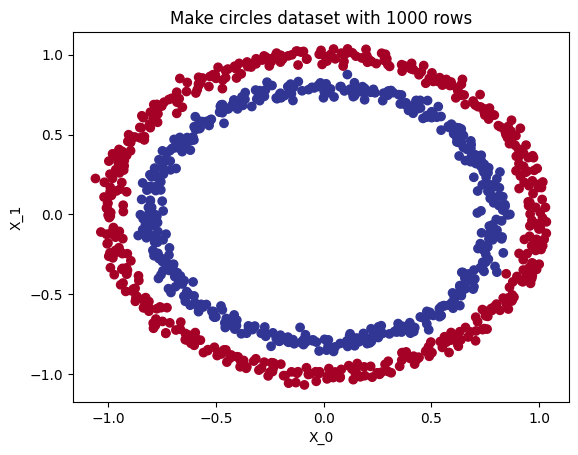

In [112]:
plt.scatter(df['X_0'], df['X_1'], c=df['Target'], cmap=plt.cm.RdYlBu)
plt.title("Make circles dataset with 1000 rows")
plt.xlabel("X_0")
plt.ylabel("X_1")
plt.show()

In [113]:
X[0]

array([0.75424625, 0.23148074])

In [114]:
X.ndim

2

In [115]:
y[0]

np.int64(1)

## Model 1: A simple neural network with 1 dense layer

In [116]:
model_1 = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape=(2,)),
        tf.keras.layers.Dense(1)
    ]
)

In [117]:
model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['accuracy']
)

In [118]:
model_1.fit(X, y, epochs=10, verbose=0)

In [119]:
model_1.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4992 - loss: 0.6957  


[0.6947563886642456, 0.515999972820282]

In [120]:
history_1 = model_1.fit(X, y, epochs=100, verbose=0)

In [121]:
model_1.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5045 - loss: 0.6933 


[0.693630039691925, 0.5]

In [122]:
def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.title("Training Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.show()
def plot_accuracy(history): 
    plt.plot(history.history['accuracy'])
    plt.xlabel("epochs")
    plt.ylabel("accuracy")
    plt.title("Training Accuracy")
    plt.show()

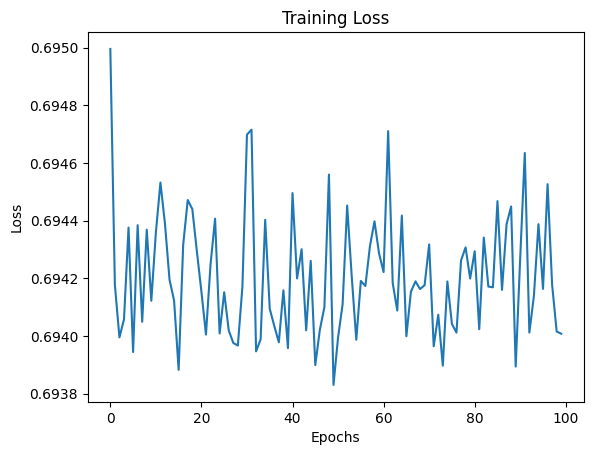

In [123]:
plot_loss(history_1)

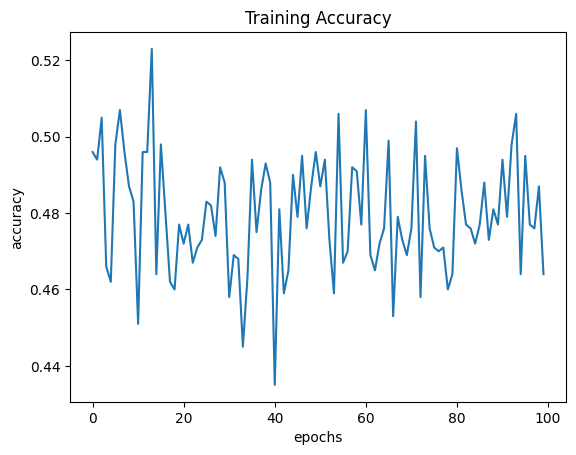

In [124]:
plot_accuracy(history_1)

---

## Model 2: with 2 dense layers

In [125]:
model_2 = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape=(2,)),
        tf.keras.layers.Dense(1),
        tf.keras.layers.Dense(1)
    ]
)

In [126]:
model_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['accuracy']
)

In [127]:
model_2.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                │ (None, 1)              │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5 (20.00 B)

 Trainable params: 5 (20.00 B)

 Non-trainable params: 0 (0.00 B)

In [128]:
history_2 = model_2.fit(X, y, epochs=10, verbose=0)

In [129]:
model_2.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4201 - loss: 0.6933  


[0.6931675672531128, 0.4169999957084656]

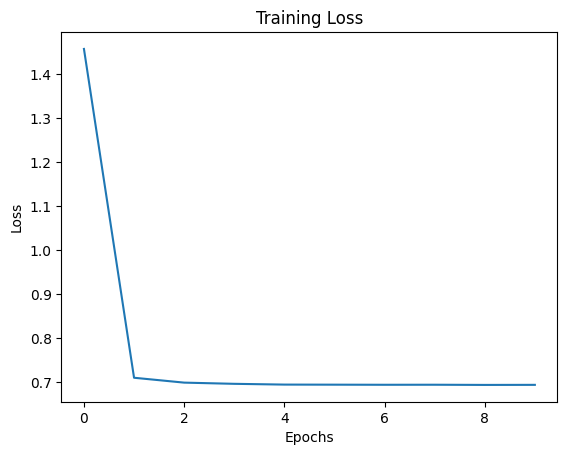

In [130]:
plot_loss(history_2)

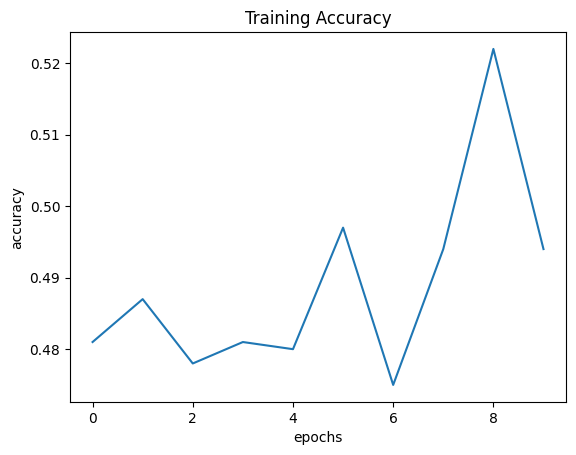

In [131]:
plot_accuracy(history_2)

---

## Model 3: with 3 Dense Layers for Classification

In [132]:
model_3 = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape=(2,)),
        tf.keras.layers.Dense(100),
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(1)
    ]
)

In [133]:
model_3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [134]:
model_3.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 100)            │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,321 (5.16 KB)

 Trainable params: 1,321 (5.16 KB)

 Non-trainable params: 0 (0.00 B)

In [135]:
history_3 = model_3.fit(X, y,epochs=100, verbose=0)

In [136]:
model_3.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4918 - loss: 0.6985


[0.6963540315628052, 0.5049999952316284]

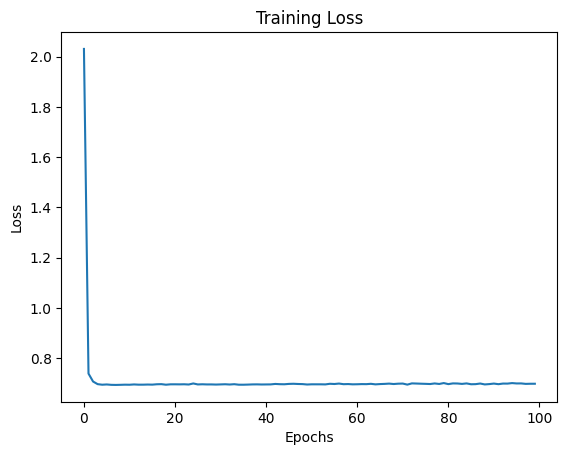

In [137]:
plot_loss(history_3)

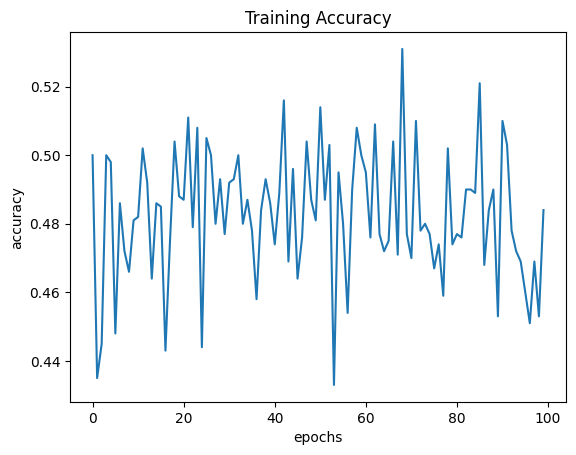

In [138]:
plot_accuracy(history_3)

## Model 4: with 3 Dense Layers for Regression

In [144]:
model_4 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(100),
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(1),
    ]
)

In [152]:
model_4.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)

In [158]:
history_4 = model_4.fit(X, y, epochs=100,verbose=0)


In [159]:
model_4.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4931 - mae: 0.4931


[0.5001165866851807, 0.5001165866851807]

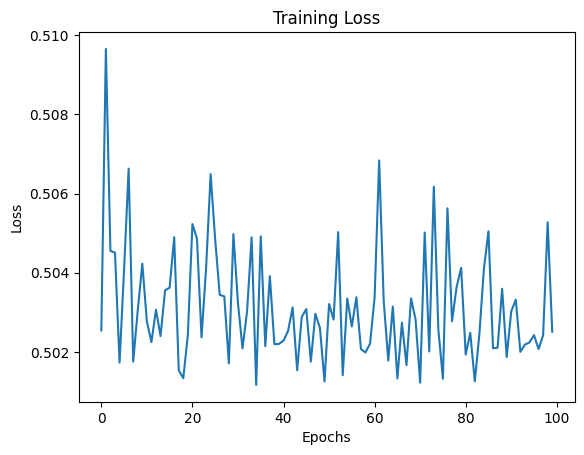

In [160]:
plot_loss(history_4)

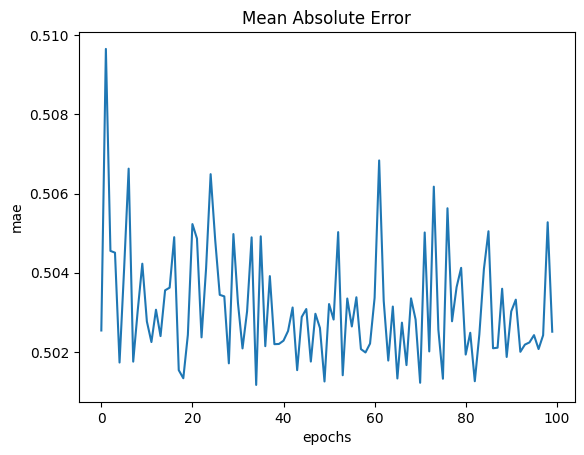

In [161]:
plt.plot(history_4.history['mae'],label='mae')
plt.xlabel("epochs")
plt.ylabel("mae")
plt.title("Mean Absolute Error")
plt.show()